In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [3]:
df = pd.read_csv("NFLX.csv")  # or your file
df['Close'] = df['Close'].astype(float)


In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


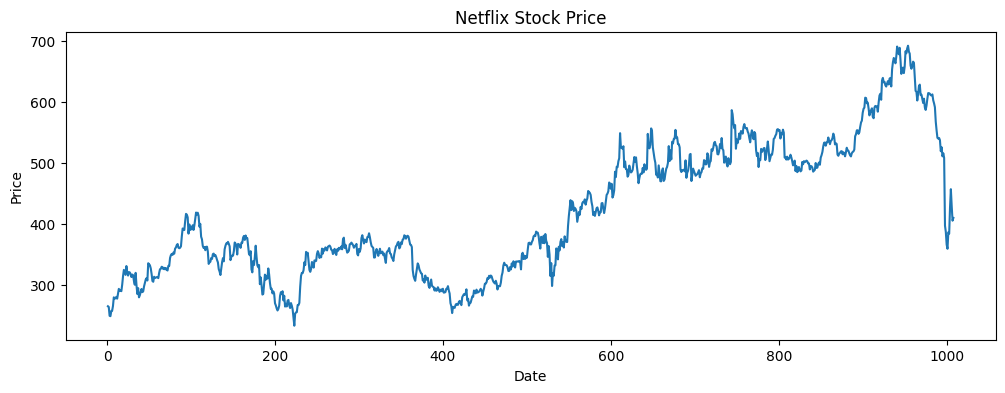

In [15]:
plt.figure(figsize=(12,4))
plt.plot(df['Close'])
plt.title("Netflix Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

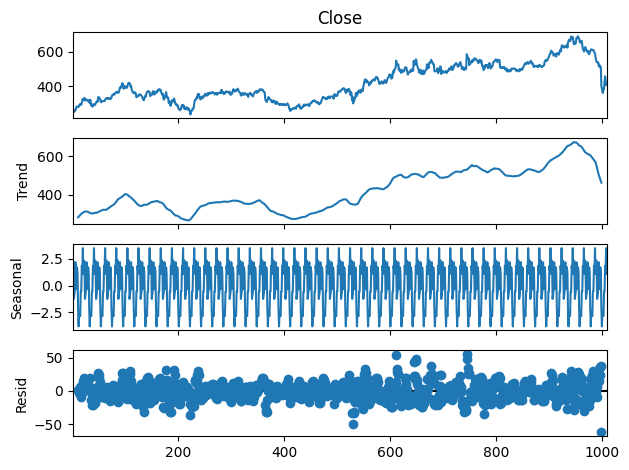

In [17]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(
    df['Close'],
    model='additive',
    period=21
)

decomposition.plot()
plt.tight_layout()
plt.show()

In [5]:
df['Return'] = np.log(df['Close'] / df['Close'].shift(1))
df.dropna(inplace=True)


In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Return
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.044086
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.004375
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.056207
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.002522
5,12-02-2018,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,0.033427
...,...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,0.105532
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,0.067856
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,-0.062393
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,-0.057208


In [7]:
scaler = MinMaxScaler(feature_range=(-1, 1))
returns_scaled = scaler.fit_transform(df[['Return']])


In [8]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

WINDOW_SIZE = 20
X, y = create_sequences(returns_scaled, WINDOW_SIZE)


In [9]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [10]:
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0403
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0223
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0201
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0194
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0179
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0180
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0181
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0190
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0178
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0159
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0179
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0190
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0191
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0200
Epoch 16/20
25/2

In [11]:
lstm_pred = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [12]:
baseline_pred = np.zeros_like(y_test)

In [13]:
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

print("LSTM RMSE (returns):", lstm_rmse)
print("Baseline RMSE (returns):", baseline_rmse)

improvement = ((baseline_rmse - lstm_rmse) / baseline_rmse) * 100
print(f"RMSE Improvement over Baseline: {improvement:.2f}%")


LSTM RMSE (returns): 0.13189500102515478
Baseline RMSE (returns): 0.2547248070050719
RMSE Improvement over Baseline: 48.22%


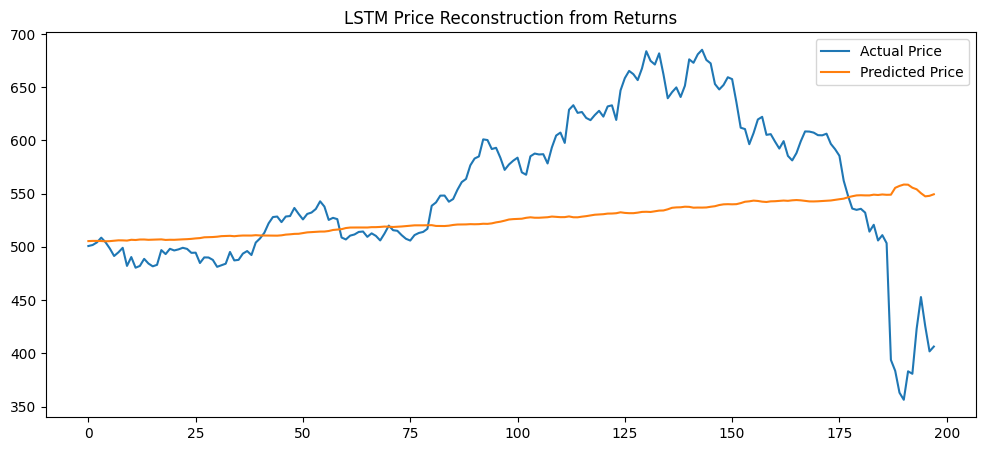

In [14]:
# Inverse scale
pred_returns = scaler.inverse_transform(lstm_pred)
actual_returns = scaler.inverse_transform(y_test)

# Starting price
price_start = df['Close'].iloc[split + WINDOW_SIZE]

pred_prices = price_start * np.exp(np.cumsum(pred_returns))
actual_prices = price_start * np.exp(np.cumsum(actual_returns))

plt.figure(figsize=(12,5))
plt.plot(actual_prices, label="Actual Price")
plt.plot(pred_prices, label="Predicted Price")
plt.legend()
plt.title("LSTM Price Reconstruction from Returns")
plt.show()
